JOBSHEET 02: KLASIFIKASI GAMBAR

Praktikum D1 – Memulai Klasifikasi Gambar dengan Dataset Sederhana 

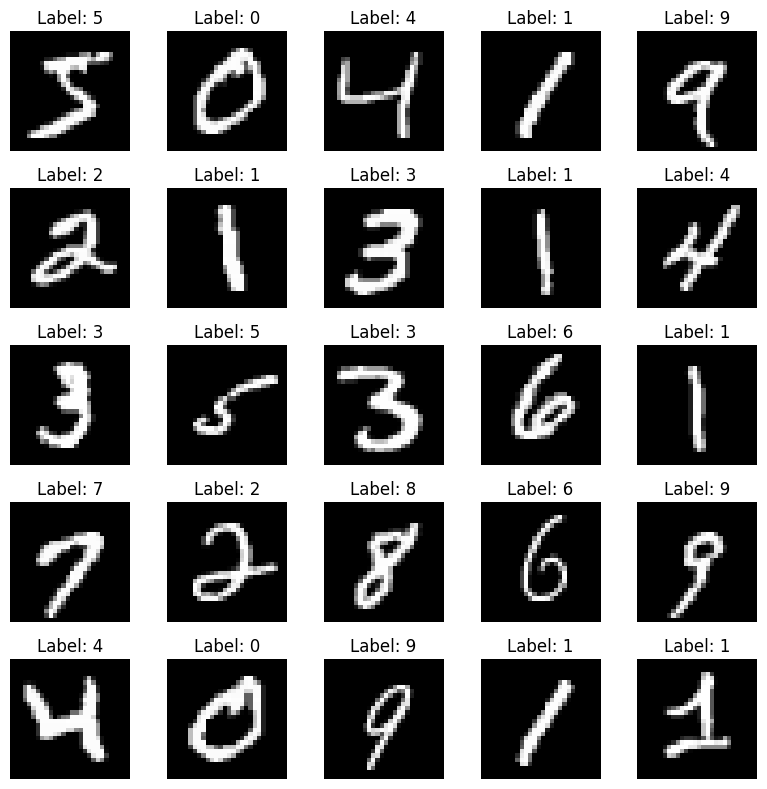

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# --- KODE YANG DIPERBAIKI ---

# Tentukan ukuran grid yang diinginkan
rows = 5
cols = 5
num_images = rows * cols

# Membuat figure dan axes. Sesuaikan figsize agar gambar tidak terlalu kecil.
plt.figure(figsize=(8, 8))

for i in range(num_images):
    # Membuat subplot untuk setiap gambar
    plt.subplot(rows, cols, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

# Panggil plt.show() HANYA SEKALI setelah loop selesai
plt.tight_layout() # Opsional: untuk merapikan jarak antar judul dan gambar
plt.show()

Praktikum D2 – Klasifikasi Gambar dengan Model Machine Learning Tradisional 

In [7]:
from sklearn import svm 
from sklearn.metrics import accuracy_score 
# Flatten 
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0 
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0 

# SVM 
clf = svm.SVC(kernel='rbf', gamma='scale') 
clf.fit(x_train_flat[:5000], y_train[:5000]) 
y_pred = clf.predict(x_test_flat) 
print("Akurasi:", accuracy_score(y_test, y_pred)) 


Akurasi: 0.9513


Praktikum D3 – Membangun CNN Sederhana 

Epoch 1/5


c:\Users\Alfin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9589 - loss: 0.1375 - val_accuracy: 0.9847 - val_loss: 0.0547
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9856 - loss: 0.0453 - val_accuracy: 0.9895 - val_loss: 0.0430
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9904 - loss: 0.0293 - val_accuracy: 0.9887 - val_loss: 0.0427
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9935 - loss: 0.0210 - val_accuracy: 0.9895 - val_loss: 0.0408
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9945 - loss: 0.0160 - val_accuracy: 0.9903 - val_loss: 0.0426


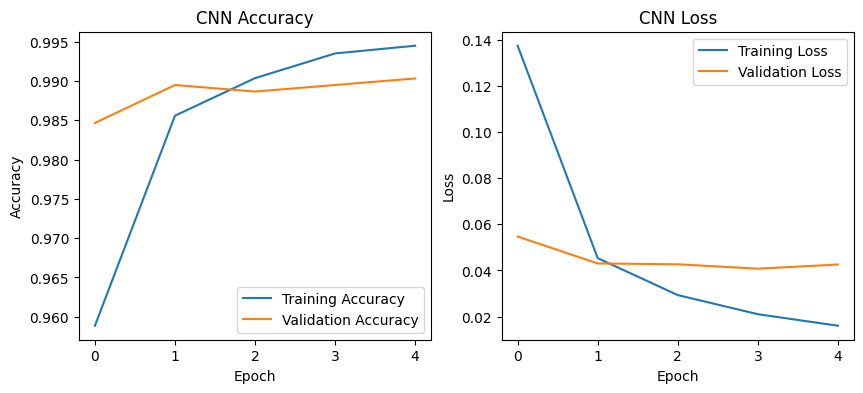

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model_cnn.fit(
    x_train_cnn, y_train,
    epochs=5,
    validation_split=0.1
)

# ===== Plot history =====
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.3396 - loss: 1.7746 - val_accuracy: 0.5078 - val_loss: 1.3960
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.4602 - loss: 1.4835 - val_accuracy: 0.5730 - val_loss: 1.2160
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.5085 - loss: 1.3621 - val_accuracy: 0.6054 - val_loss: 1.1360
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.5412 - loss: 1.2777 - val_accuracy: 0.5992 - val_loss: 1.1187
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.5720 - loss: 1.2043 - val_accuracy: 0.6500 - val_loss: 1.0267
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.5899 - loss: 1.1530 - val_accuracy: 0.6646 - val_loss: 0.9812
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.6091 - loss: 1.0989 - val_accuracy: 0.6706 - val_loss: 0.9659
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.6228 -

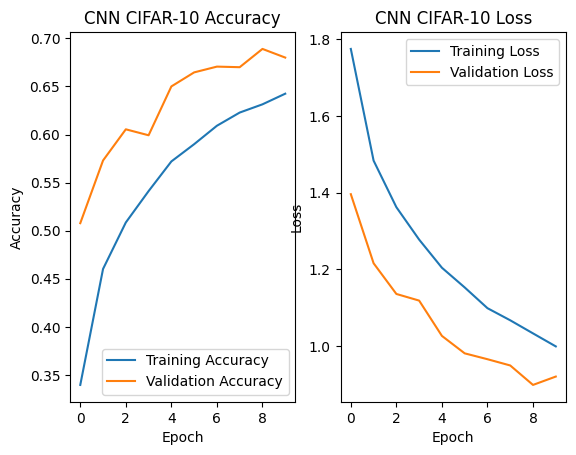

In [11]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
   layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)),
   layers.MaxPooling2D((2,2)),
   layers.Conv2D(64, (3,3), activation="relu"),
   layers.MaxPooling2D((2,2)),
   layers.Flatten(),
   layers.Dense(64, activation="relu"),
   layers.Dropout(0.5),
   layers.Dense(10, activation="softmax")
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Praktikum D5 – Transfer Learning dengan Model Pra-Latih 

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 363s 257ms/step - accuracy: 0.5602 - loss: 1.2519 - val_accuracy: 0.6040 - val_loss: 1.1179
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 247s 176ms/step - accuracy: 0.6354 - loss: 1.0478 - val_accuracy: 0.6326 - val_loss: 1.0448
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 145s 103ms/step - accuracy: 0.6594 - loss: 0.9734 - val_accuracy: 0.6346 - val_loss: 1.0414
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 157s 112ms/step - accuracy: 0.6743 - loss: 0.9273 - val_accuracy: 0.6586 - val_loss: 0.9713
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 156s 111ms/step - accuracy: 0.6881 - loss: 0.8825 - val_accuracy: 0.6714 - val_loss: 0.9546


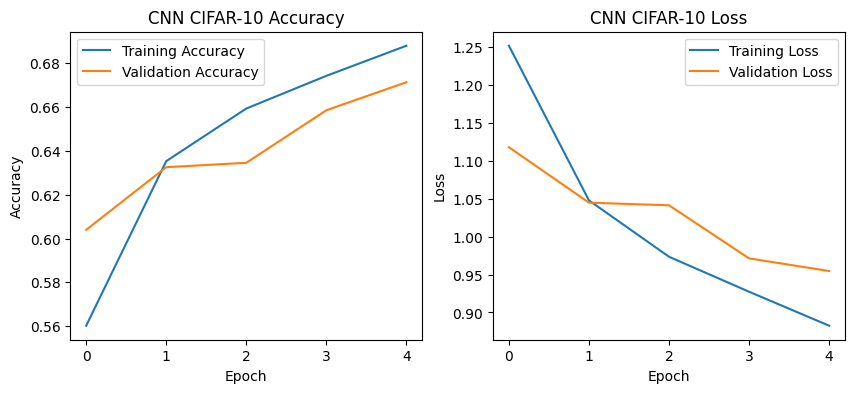

In [13]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(32,32,3))

for layer in base_model.layers:
    layer.trainable = False

# Aktifkan 2 layer terakhir
for layer in base_model.layers[-2:]:
    layer.trainable = True


model = models.Sequential([
   base_model,
   layers.Flatten(),
   layers.Dense(128, activation='relu'),
   layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# == Plot history ==
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Praktikum D6 – Evaluasi dengan Confusion Matrix dan Metrik Lain 

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step
              precision    recall  f1-score   support

           0       0.68      0.77      0.72      1000
           1       0.81      0.69      0.75      1000
           2       0.65      0.50      0.57      1000
           3       0.51      0.49      0.50      1000
           4       0.50      0.76      0.60      1000
           5       0.60      0.52      0.56      1000
           6       0.71      0.68      0.69      1000
           7       0.82      0.59      0.69      1000
           8       0.66      0.85      0.74      1000
           9       0.75      0.70      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.65     10000
weighted avg       0.67      0.66      0.65     10000



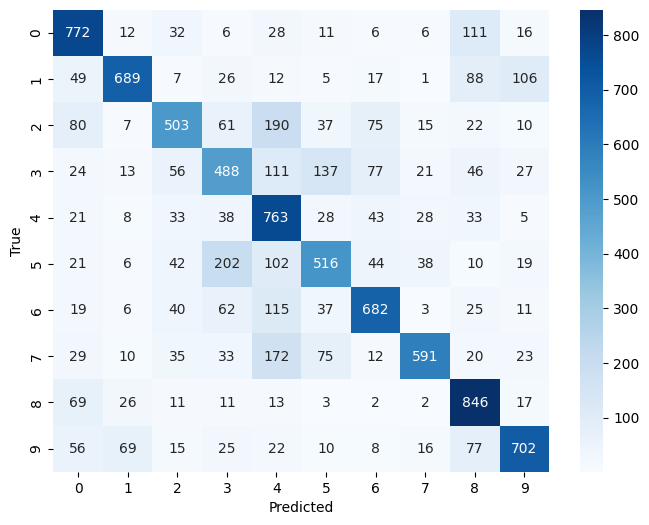

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Penugasan

In [15]:
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
   # Grayscale + autocontrast
   img = img_pil.convert('L')
   img = ImageOps.autocontrast(img)

   arr = np.array(img).astype(np.uint8)
   if arr.mean() > 127:
      img = ImageOps.invert(img)
      arr = np.array(img)

   # binarisasi ringan utk cari bbox digit
   thr = np.mean(arr) * 0.8
   mask = arr > thr
   if mask.any():
      ys, xs = np.where(mask)
      y0, y1 = ys.min(), ys.max()
      x0, x1 = xs.min(), xs.max()
      img = img.crop((x0, y0, x1+1, y1+1))

   # resize ke 20x20 dengan aspect ratio
   img.thumbnail((20, 20), Image.Resampling.LANCZOS)
   w, h = img.size

   # pad ke 28x28 dan center
   canvas = Image.new('L', (28, 28), color=0)
   canvas.paste(img, ((28 - w)//2, (28 - h)//2))

   # normalisasi ke [0, 1]
   arr = np.array(canvas).astype('float32') / 255.0
   arr = arr[..., None]
   return canvas, arr


Prediksi dengan CNN

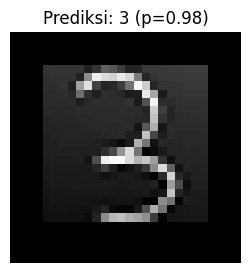

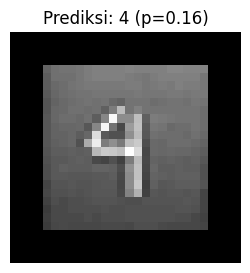

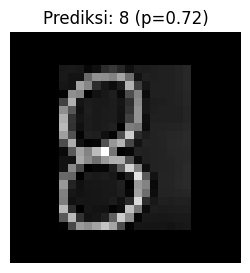

Rekap Prediksi (CNN):
- angka3.jpg -> 3 (p=0.984)
- nomor4.jpg -> 4 (p=0.163)
- angka8.jpg -> 8 (p=0.720)


In [61]:
import matplotlib.pyplot as plt

filenames = ["angka3.jpg", "nomor4.jpg", "angka8.jpg"]
result = []

for fname in filenames:
   img_pil = Image.open(fname)
   disp, x = preprocess_to_mnist_28x28(img_pil)
   x_batch = np.expand_dims(x, axis=0)
   probs = model_cnn.predict(x_batch, verbose=0) [0]
   pred = int(np.argmax(probs))
   conf = float(np.max(probs))

   result.append((fname, pred, conf))

   # tampilkan hasil
   plt.figure(figsize=(3,3))
   plt.imshow(disp, cmap='gray')
   plt.title(f"Prediksi: {pred} (p={conf:.2f})")
   plt.axis('off')
   plt.show()

print("Rekap Prediksi (CNN):")
for r in result:
   print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")
